### Importação dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [6]:
# criar coluna para identificar as lojas
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


In [7]:
#Unir os DatFrames
todas_as_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


In [8]:
#Criar a coluna de faturamento (Preço + Frete)
todas_as_lojas['Faturamento'] = todas_as_lojas['Preço'] + todas_as_lojas['Frete']


In [55]:
# Calcular faturamento total por loja
faturamento_por_loja = todas_as_lojas.groupby('Loja')['Faturamento'].sum()

# Formatar os valores para exibir em formato monetário
faturamento_formatado = faturamento_por_loja.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
print(faturamento_formatado)

# Identificar a loja com o menor faturamento
loja_com_menor_faturamento = faturamento_por_loja.idxmin()  # Nome da loja com o menor faturamento
faturamento_menor = faturamento_por_loja.min()  # Valor de faturamento da loja com o menor faturamento

# Exibir o resultado
print(f'\nA loja com o menor faturamento é: {loja_com_menor_faturamento} com um faturamento de {faturamento_formatado[loja_com_menor_faturamento]}')




Loja
Loja 1    R$ 1.616.347,09
Loja 2    R$ 1.567.773,22
Loja 3    R$ 1.542.047,69
Loja 4    R$ 1.458.253,46
Name: Faturamento, dtype: object

A loja com o menor faturamento é: Loja 4 com um faturamento de R$ 1.458.253,46


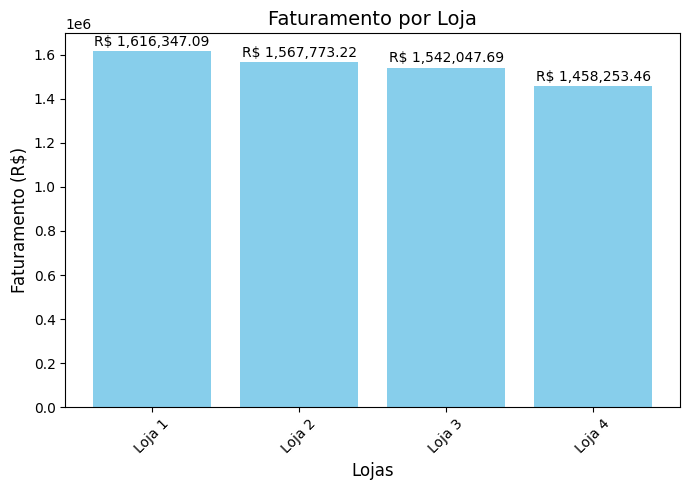

In [52]:
# Gráfico colunas do faturamento por loja:
import matplotlib.pyplot as plt

# Formatar os valores
faturamento_formatado = faturamento_por_loja.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

# Criar o gráfico de barras
plt.figure(figsize=(7,5))
plt.bar(faturamento_formatado.index, faturamento_por_loja, color='skyblue')

# Adicionar títulos e labels
plt.title('Faturamento por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Exibir os valores no topo de cada barra
for i, v in enumerate(faturamento_por_loja):
    plt.text(i, v + 10000, f'R$ {v:,.2f}', ha='center', va='bottom', fontsize=10)

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [12]:
#Vendas por categorias de produtos
faturamento_por_categoria = todas_as_lojas.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)
print(faturamento_por_categoria)


Categoria do Produto
eletronicos              2.332048e+06
eletrodomesticos         1.860199e+06
moveis                   1.064150e+06
instrumentos musicais    4.897015e+05
esporte e lazer          2.008919e+05
brinquedos               1.035024e+05
utilidades domesticas    8.092172e+04
livros                   5.300743e+04
Name: Faturamento, dtype: float64


In [22]:
#Exibir formatado
faturamento_formatado = faturamento_por_categoria.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
print(faturamento_formatado)


Categoria do Produto
eletronicos              R$ 2.332.048,08
eletrodomesticos         R$ 1.860.198,66
moveis                   R$ 1.064.149,77
instrumentos musicais      R$ 489.701,48
esporte e lazer            R$ 200.891,94
brinquedos                 R$ 103.502,36
utilidades domesticas       R$ 80.921,72
livros                      R$ 53.007,43
Name: Faturamento, dtype: object


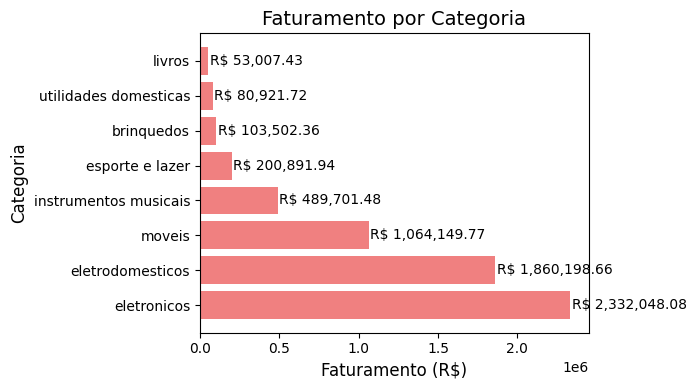

In [46]:
#Gráfico de barras
import matplotlib.pyplot as plt

# Formatar os valores
faturamento_formatado = faturamento_por_categoria.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(7,4))
plt.barh(faturamento_formatado.index, faturamento_por_categoria, color='lightcoral')

# Adicionar títulos e labels
plt.title('Faturamento por Categoria', fontsize=14)
plt.xlabel('Faturamento (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)

# Exibir os valores no final de cada barra
for i, v in enumerate(faturamento_por_categoria):
    plt.text(v + 10000, i, f'R$ {v:,.2f}', va='center', fontsize=10)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [23]:
media_avaliacao_por_loja = todas_as_lojas.groupby('Loja')['Avaliação da compra'].mean()


In [24]:
#Exibir formatado
media_avaliacao_por_loja = media_avaliacao_por_loja.round(2)
print(media_avaliacao_por_loja)


Loja
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
Name: Avaliação da compra, dtype: float64


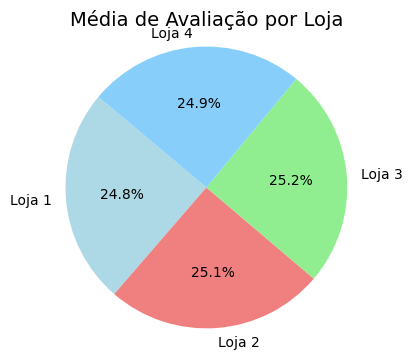

In [44]:
#Grafico de Pizza para as médias

# Criar o gráfico de pizza
plt.figure(figsize=(4,4))
plt.pie(media_avaliacao_por_loja, labels=media_avaliacao_por_loja.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen', 'lightskyblue'])

# Título
plt.title('Média de Avaliação por Loja', fontsize=14)

# Exibir o gráfico
plt.axis('equal')  # Garantir que o gráfico seja circular
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [32]:
produtos_vendidos = todas_as_lojas.groupby('Produto')['Quantidade de parcelas'].sum()
#exibir ordenado do maior para o menor
produtos_vendidos_sorted = produtos_vendidos.sort_values(ascending=False)
print(produtos_vendidos_sorted)
print(' Com base nos dados apurados, temos:')
mais_vendido = produtos_vendidos.idxmax()  # Produto mais vendido
menos_vendido = produtos_vendidos.idxmin()  # Produto menos vendido

# Exibir os resultados
print(f"Produto mais vendido: {mais_vendido} - Quantidade: {produtos_vendidos.max()}")
print(f"Produto menos vendido: {menos_vendido} - Quantidade: {produtos_vendidos.min()}")

Produto
Secadora de roupas             649
Cômoda                         627
Pandeiro                       625
Bicicleta                      614
Celular Plus X42               611
Cama king                      603
Jogo de panelas                601
Micro-ondas                    600
Bateria                        595
Violão                         595
Cadeira de escritório          588
Geladeira                      583
Cama box                       578
Iniciando em programação       574
Blocos de montar               573
Fone de ouvido                 572
Carrinho controle remoto       566
Modelagem preditiva            566
Smart TV                       558
Guarda roupas                  554
Ciência de dados com python    554
TV Led UHD 4K                  551
Faqueiro                       549
Dashboards com Power BI        545
Lavadora de roupas             541
Copo térmico                   537
Mesa de jantar                 535
Sofá retrátil                  534
Fogão       

# 5. Frete Médio por Loja


In [33]:
#calcular frete médio por loja:
frete_medio_por_loja = todas_as_lojas.groupby('Loja')['Frete'].mean()


In [56]:
#exibir frete formatado
frete_medio_formatado = frete_medio_por_loja.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
print(frete_medio_formatado)

Loja
Loja 1    R$ 34,69
Loja 2    R$ 33,62
Loja 3    R$ 33,07
Loja 4    R$ 31,28
Name: Frete, dtype: object


# **Relatório Gerado**

Baseado nos dados apurados e identificado por gráfico, no item 1 de "Análise de Faturamento", concluiu-se que a **loja 4 tem menor faturamento** entre as analisadas, sendo altamente recomendada sua venda por parte do senhor João.
